In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analisis (EDA)

## Target

In [3]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Numerik vs Target

<AxesSubplot:>

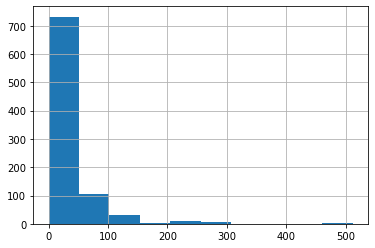

In [4]:
df.Fare.hist()

(array([160.,  73.,  70.,  39.]),
 array([  0,  25,  50, 100, 600]),
 <BarContainer object of 4 artists>)

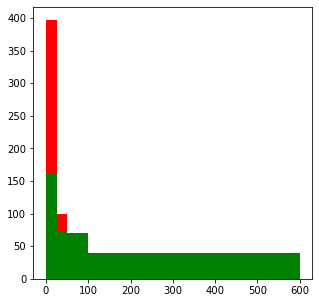

In [5]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.hist(df.Fare[df.Survived == 0], bins= [0,25,50,100,600],color= 'r', label="Not_Survived")
ax.hist(df.Fare[df.Survived == 1], bins= [0,25,50,100,600],color= 'g',label = "Survived")

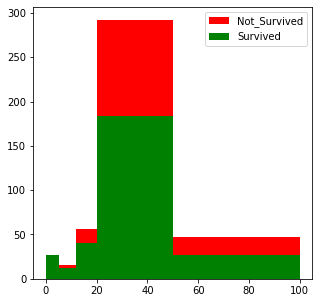

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.hist(df.Age[df.Survived == 0], bins= [0,5,12,20,50,100],color= 'r', label="Not_Survived")
ax.hist(df.Age[df.Survived == 1], bins= [0,5,12,20,50,100],color= 'g', label="Survived")
ax.legend()

# Categoric vs Target

Pclass AxesSubplot(0.125,0.536818;0.227941x0.343182)
Sex AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Parch AxesSubplot(0.672059,0.536818;0.227941x0.343182)
SibSp AxesSubplot(0.125,0.125;0.227941x0.343182)
Embarked AxesSubplot(0.398529,0.125;0.227941x0.343182)


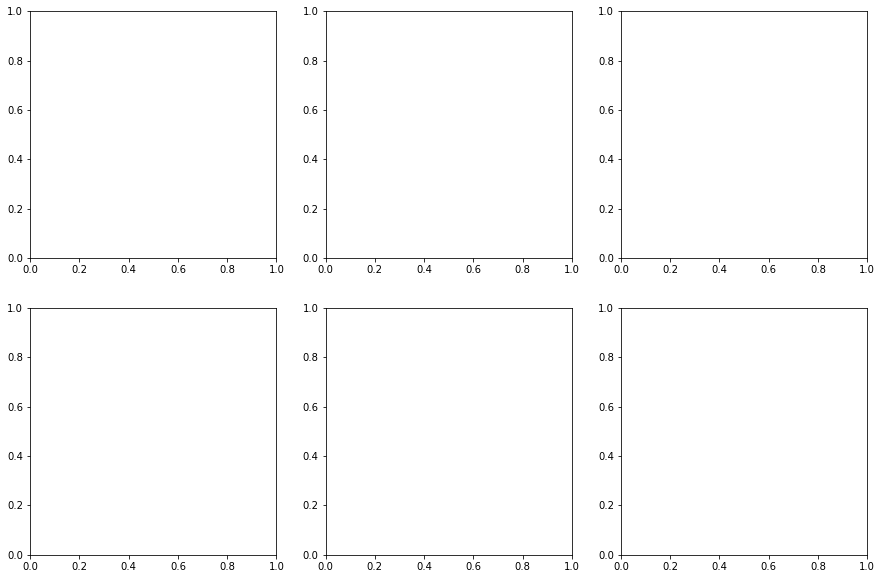

In [9]:
cat_var = ["Pclass","Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2,3, figsize = (15,10))

for cat,ax in zip(cat_var,axes.flatten()):
    print(cat,ax)

In [10]:
import seaborn as sns

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahmat\anaconda3\li

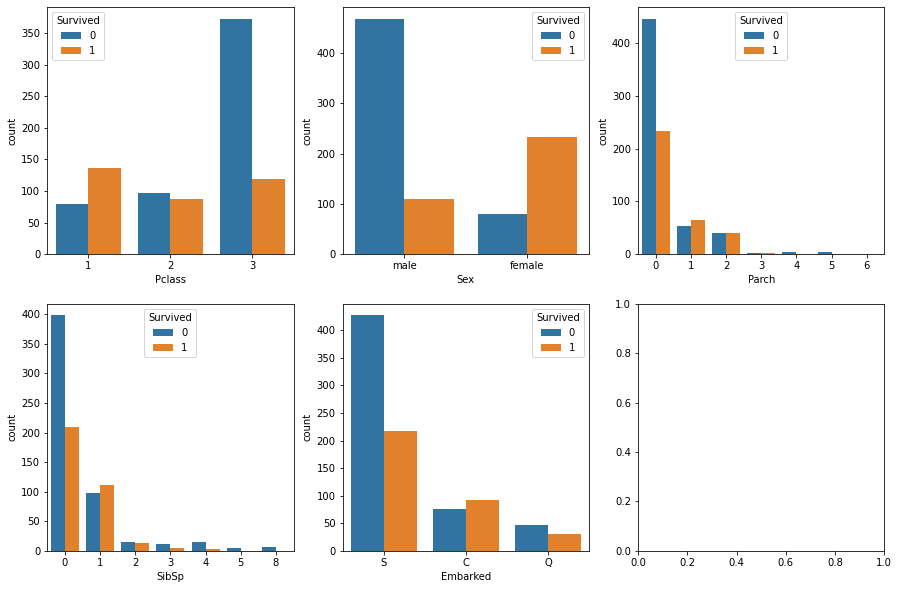

In [11]:
cat_var = ["Pclass","Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2,3, figsize = (15,10))

for cat,ax in zip(cat_var,axes.flatten()):
    sns.countplot(cat, data = df, hue="Survived", ax= ax)

In [12]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [13]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


# Feature Engineering

### Adding feature

In [14]:
df.Parch == 0

PassengerId
1       True
2       True
3       True
4       True
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: Parch, Length: 891, dtype: bool

In [15]:
df["isAlone"] = (df.Parch == 0) & (df.SibSp == 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [16]:
df.Age = pd.cut(df.Age, bins = [0,5,12,20,50,100], labels=["balita", "anak-anak", "remaja", "dewasa", "orangtua"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,dewasa,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,dewasa,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,dewasa,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,dewasa,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,dewasa,0,0,373450,8.0500,NaN,S,True


In [17]:
df.Fare = pd.cut(df.Fare, bins = [0,25,100,600], labels=["murah", "mahal", "eksekutif"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,dewasa,1,0,A/5 21171,murah,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,dewasa,1,0,PC 17599,mahal,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,dewasa,0,0,STON/O2. 3101282,murah,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,dewasa,1,0,113803,mahal,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,dewasa,0,0,373450,murah,NaN,S,True


# Dataset Splitting

In [19]:
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify= y , random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

# Preprocessing

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [28]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'isAlone'],
      dtype='object')

In [29]:
num_pipe = Pipeline([
    ("impute", SimpleImputer()),
    ("scaler", MinMaxScaler())
])
cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("encode", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("numeric", num_pipe,["SibSp","Parch"]),
    ("categoric", cat_pipe, ["Pclass", "Sex", "Age", "Fare", "Embarked", "isAlone"])
])


# Training

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])
parameter = {
    "algo__n_neighbors" : range(2,51,2),
    "algo__weights" : ["uniform", "distance"],
    "algo__p" : [1,2]
}
model = GridSearchCV(pipeline, param_grid= parameter, cv = 3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
print(model.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.8378812199036918 0.8057645856558899 0.7910447761194029
{'algo__n_neighbors': 6, 'algo__p': 2, 'algo__weights': 'uniform'}


# Menggabungkan Sklearn dengan Package Lain

In [36]:
from jcopml.tuning import grid_search_params as gsp
from jcopml.pipeline import num_pipe, cat_pipe

In [34]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="minmax"),["SibSp","Parch"]),
    ("categoric", cat_pipe(encoder="onehot"), ["Pclass", "Sex", "Age", "Fare", "Embarked", "isAlone"])
])


In [37]:
gsp.knn_params

{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [38]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])


model = GridSearchCV(pipeline, param_grid= gsp.knn_params, cv = 3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
print(model.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
0.8507223113964687 0.8089697138610182 0.7798507462686567
{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__weights': 'uniform'}
